In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from decision_tree import DecisionTree
from RF import RandomForest
from logistic import Logistic
#import scaler
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset
df = pd.read_csv('pd_speech_features.csv', header=1)
df = df.drop(['id'], axis=1)  # Drop the 'id' column
df = df.dropna()              # Drop rows with missing values
df = df.reset_index(drop=True)  # Reset index after dropping rows

# Split data into features and target variable
X = df.drop(['class'], axis=1)
y = df['class']

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# show types in y_train
print(y.unique())  # Check unique values in y
print(y.value_counts())  # Check the distribution of y
print(df['class'].head())
# Check the split target values
print(f"y_train values: {y_train.unique()}")
print(f"y_train distribution: {y_train.value_counts()}")
print(f"y_test values: {y_test.unique()}")




[1 0]
class
1    564
0    192
Name: count, dtype: int64
0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64
y_train values: [1 0]
y_train distribution: class
1    450
0    154
Name: count, dtype: int64
y_test values: [0 1]


In [4]:
from lightGBM_copy import LightGBM

model = LightGBM(n_estimators=3, learning_rate=0.1)
model.fit(X_train.values, y_train.values)
predictions = model.predict(X_test.values)

print("Accuracy:", accuracy_score(y_test, predictions))


Fitting tree 1...
Constructed tree with Node(feature=125, value=0.0085522, gain=214.4498451182355) leaves.
Fitting tree 2...
Constructed tree with Node(feature=462, value=0.031134, gain=1554.1117385384332) leaves.
Fitting tree 3...
Constructed tree with Node(feature=462, value=0.031134, gain=1548.0179373538924) leaves.
Accuracy: 0.75


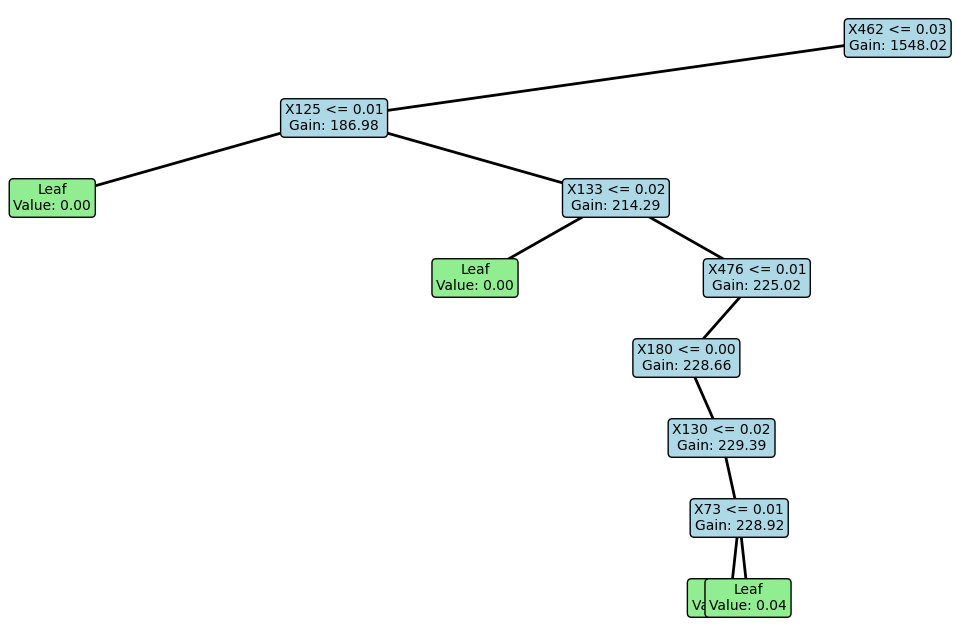

In [5]:
model.visualize()


In [6]:
# lightgbm from sklearn
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators=3, learning_rate=0.1, max_depth=3)
model.fit(X_train.values, y_train.values)
predictions = model.predict(X_test.values)

print("Accuracy:", accuracy_score(y_test, predictions))


[LightGBM] [Info] Number of positive: 450, number of negative: 154
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 150492
[LightGBM] [Info] Number of data points in the train set: 604, number of used features: 753
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.745033 -> initscore=1.072295
[LightGBM] [Info] Start training from score 1.072295
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.75


In [7]:


# Decision Tree Classifier
# Train the Decision Tree
dt = DecisionTree(max_depth=10, min_samples_split=2, n_feats=3)
dt.fit(X_train.values, y_train.values)

# Predict and evaluate
y_pred = dt.predict(X_test.values)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

# Logistic Regression (using the custom Logistic class)
lr = Logistic(learning_rate=0.1)  # Ensure data is in NumPy array format
lr.train_logistic_regression(X_train.values, y_train.values)
y_pred_lr = lr.predict_multiclass(X_test.values)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression accuracy:", accuracy_lr)

# # Random Forest Classifier
rf = RandomForest(n_trees=10,max_depth=3)# Ensure data is in NumPy array format
rf.fit(X_train.values, y_train.values)
y_pred_rf = rf.predict(X_test.values)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest accuracy:", accuracy_rf)


Unique values in y: [0 1]
Decision Tree Accuracy: 0.5460526315789473
Epoch 0: Loss = 0.6931471805599453
Epoch 100: Loss = 5.870829520718236
Epoch 200: Loss = 17.155021388226167
Epoch 300: Loss = 17.155021388226167
Epoch 400: Loss = 5.870829520718236


c:\Users\pc\OneDrive\Documents\IASD\machine learning\PROJET\logistic.py:20: RuntimeWarning: overflow encountered in exp
  np.exp(z) / (1 + np.exp(z)))
c:\Users\pc\OneDrive\Documents\IASD\machine learning\PROJET\logistic.py:20: RuntimeWarning: invalid value encountered in divide
  np.exp(z) / (1 + np.exp(z)))
c:\Users\pc\OneDrive\Documents\IASD\machine learning\PROJET\logistic.py:19: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(-z)),


Epoch 500: Loss = 5.870829520718236
Epoch 600: Loss = 5.870829520718236
Epoch 700: Loss = 5.870829520718236
Epoch 800: Loss = 5.870829520718236
Epoch 900: Loss = 17.155021388226167
Logistic Regression accuracy: 0.25
n_trees: 10, type: <class 'int'>
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
Random Forest accuracy: 0.6447368421052632


In [ ]:
import numpy as np
from sklearn.model_selection import KFold # KFold : Provides train/test indices to split data in train/test sets
from sklearn.metrics import accuracy_score

def cross_validate(model_class, X, y, model_params=None, n_splits=10):
    """
    Perform 10-fold cross-validation for any given model.

    :param model_class: Class of the model to be tested (e.g., Logistic, LeafWiseTree, etc.)
    :param X: Input features
    :param y: Target labels
    :param model_params: Dictionary of model-specific parameters (default is None)
    :param n_splits: Number of splits for cross-validation (default is 10)
    :return: Average accuracy over all folds
    """
    if model_params is None:
        model_params = {}

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Perform cross-validation
    for train_idx, test_idx in kf.split(X):
        print("fold number: ",train_idx)
        # Split the data
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Initialize the model with the given parameters
        model = model_class(**model_params)

        # Train the model
        model.fit(X_train, y_train)

        # Test the model
        y_pred = model.predict(X_test)

        # Evaluate the accuracy of the model on the test set
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Return average accuracy across all folds
    return np.mean(accuracies)

# Example usage:


dt_params = {'max_depth': 10, 'min_samples_split': 2, 'n_feats': 3}
dt_avg_accuracy = cross_validate(DecisionTree, X.values, y.values, model_params=dt_params)
print(f"Decision Tree 10-fold CV Accuracy: {dt_avg_accuracy:.4f}")

rf_params = {'n_trees': 3, 'max_depth': 3}
rf_avg_accuracy = cross_validate(RandomForest, X.values, y.values, model_params=rf_params)
print(f"Random Forest 10-fold CV Accuracy: {rf_avg_accuracy:.4f}")

# lightgbm
lgbm_params = {'n_estimators': 3, 'learning_rate': 0.1}
lgbm_avg_accuracy = cross_validate(LightGBM, X.values, y.values, model_params=lgbm_params)
print(f"LightGBM 10-fold CV Accuracy: {lgbm_avg_accuracy:.4f}")

# logistic regression
lr_params = {'learning_rate': 0.1}
lr_avg_accuracy = cross_validate(Logistic, X.values, y.values, model_params=lr_params)
print(f"Logistic Regression 10-fold CV Accuracy: {lr_avg_accuracy:.4f}")




Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
Decision Tree 10-fold CV Accuracy: 0.5549
n_trees: 3, type: <class 'int'>
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
n_trees: 3, type: <class 'int'>
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
n_trees: 3, type: <class 'int'>
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
n_trees: 3, type: <class 'int'>
Unique values in y: [0 1]
Unique values in y: [0 1]
Unique values in y: [0 1]
n_trees: 3, type: <class 'int'>
Unique values in y: [0 1]
Unique values in y: [0 1]
